# **Генерация псевдослучайных чисел**

Модуль `numpy.random` дополняет встроенный модуль `random` функциями, которые генерируют целые массивы случайных чисел с различными распределениями вероятности. Например, с помощью функции можно получить случайный массив 4x4 с нормальным распределением:

In [1]:
import numpy as np

In [32]:
samples = np.random.normal(size = (4,4))
samples

array([[ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00,
        -3.12651896e-01],
       [-7.20588733e-01,  8.87162940e-01,  8.59588414e-01,
        -6.36523504e-01],
       [ 1.56963721e-02, -2.24268495e+00,  1.15003572e+00,
         9.91946022e-01],
       [ 9.53324128e-01, -2.02125482e+00, -3.34077366e-01,
         2.11836468e-03]])

Встроенный в Python модуль `random` умеет выдавать только по одному случайному числу за одно обращение. Ниже видно, что `numpy.random` более чем на порядок быстрее стандартного модуля при генерации очень больших выборок:

In [3]:
from random import normalvariate

In [6]:
n = 1000000

In [7]:
%timeit samples = [normalvariate(0,1) for _ in range(n)]

1 loop, best of 5: 982 ms per loop


In [8]:
%timeit np.random.normal(size = n)

10 loops, best of 5: 44.9 ms per loop


Числа, сгенерированные модулями, называются *псевдослучайными*, потому что они генерируются детерминированным алгоритмом на основе *начального значения*, которое можно изменить при помощи метода `np.random.seed`:

In [10]:
np.random.seed(1234) #начальное значение равно 1234

В функциях генерации данных из модуля `np.random` используется глобальное начальное значение. Чтобы не вводить глобальное состояние, можно воспользоваться методом `numpy.random.RandomState`, которое порождает случайное число, не зависящее от прочих:

In [29]:
from numpy.lib.polynomial import polyint
rng = np.random.RandomState(10) #создает случайное число, не зависящее от прочих, чтобы при повторном запуске кода были те же числа
a = rng.randn(10) #создается массив из 10 случайных чисел
b = rng.randn(10)
print(a)
print(b)

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021]
[ 0.43302619  1.20303737 -0.96506567  1.02827408  0.22863013  0.44513761
 -1.13660221  0.13513688  1.484537   -1.07980489]


Наиболее употребительные функции из модуля `numpy.random`:

In [ ]:
seed #задает начальное значение генератора случайных чисел
permutation #возвращает случайную перестановку последовательности или диапазона
shuffle #случайным образом переставляет последовательность на месте
rand #случайная выборка с равномерным распределением
randint #случайная выборка целого числа из заданного диапазона
randn #случайная выборка с нормальным распределением со средним 0 и стандартным отклонением 1 (интерфейс похож на MATLAB)
binomial #случайная выборка с биномиальным распределением
normal #случайная выборка с нормальным (гауссовым) распределением
beta #случайная выборка с бета-распределением
chisquare #случайная выборка с распределением хи-квадрат
gamma #случайная выборка с гамма-распределением
uniform #случайная выборка с равномерным распределением на полуинтервале [0, 1)

# **Пример: случайное блуждание**

Промллючтрируем операции с массивами на примере случайного блуждания. Сначала рассмотрим простое случацное блуждание с начальной точкой `0` и шагами `1` и `-1`, выбираемыми с одинаковой вероятностью.

Вот реализация одного случайного блуждаения с `1000` шагов на чистом Python с помощью встроенного модуля `random`:

In [58]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
  step = 1 if random.randint(0,1) else -1
  position += step
  walk.append(position)

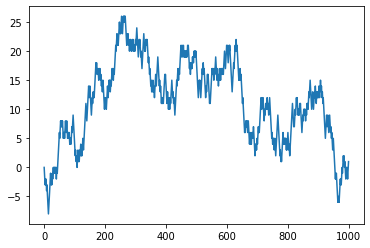

In [59]:
import matplotlib.pyplot as plt
plt.plot(walk[:1000])

В данном случае `walk` — просто нарастающая сумма случайных шагов, которую можно вычислить как выражение-массив. Поэтому можно воспользоваться модулем `np.random`, чтобы за один присест подбросить `1000` монет с исходами `1` и `-1` и высимлить нарастающую сумму:

In [67]:
nsteps = 10000
draws = np.random.randint(0,2, size = nsteps) #создаем массив из нулей и единиц случайного содержания и размером nsteps
steps = np.where(draws > 0, 1, -1) #создаем массив, который заполняется 1 и -1 согласно булеву условию
walk = steps.cumsum() #считаем частичную сумму и вносим ее в массив

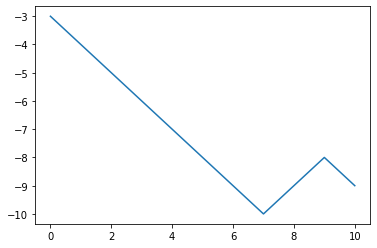

In [74]:
import matplotlib.pyplot as plt
plt.plot(walk[120:131])

Теперь вычислим статистики:

In [69]:
walk.min()

-84

In [70]:
walk.max()

53

Более сложная статистика — *момент первого пересечения* — это шаг, на котором траектория случайного блуждания впервые достигает заданного значения. В данном случае нам интересно, сколько времени потребуется на то, чтобы удалиться от начала (нуля) на десять единиц в любом нарпавлении. Выражение `np.abs(walk) >= 10` дает булев массив, показывающий, в какие моменты блуждание достигало или превышало `10`, однако нас интересует индекс *первого* значения `10` или `-10`. Его можно вычислить с помощью функции `argmax`, которая возвращает индекс первого максимального значения в булевом массиве (`True` — максимальное значение):

In [71]:
(np.abs(walk) >= 10).argmax()

127

Использование `argmax` не всегда эффективно, потому что эта функция всегда просматривает весь массив. В данном частном случае известно, что первое же встретившееся значение `True` является максимальным.

# **Моделирование сразу нескольких случайных блужданий**

Если бы требовалось смоделировать много случайных блужданий, например, 5000, то это можно было бы сделать путем совсем небольшой модификации рассмотренного выше кода. Если функциям из модуля `numpy.random` передать 2-кортеж, то они сгенерируют двумерный массив случайных числе, и мы сможем вычислить нарастающие суммы по строкам, то есть все 5000 случайных блужданий за одну операцию:

In [78]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2, size = (nwalks, nsteps)) #двумерный массив из нулей и единиц размером 5000x1000
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) #полусуммы по оси 1
walks

array([[ -1,  -2,  -3, ...,   0,  -1,  -2],
       [ -1,  -2,  -1, ..., -30, -29, -28],
       [ -1,  -2,  -3, ...,  -8,  -7,  -6],
       ...,
       [ -1,  -2,  -3, ..., -22, -21, -20],
       [  1,   2,   3, ..., -14, -13, -14],
       [  1,   0,   1, ...,  20,  19,  18]])

Теперь можно вычислить максимум и минимум по всем блужданиям:

In [79]:
walks.max()

118

In [80]:
walks.min()

-130

Вычислим для этих блужданий минимальный момент первого пересечения с уровнем `30` или `-30`. Предварительно проверим, происходит ли блуждание до `30` или `-30` хотя бы раз, с помощью метода `any`: 

In [82]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ...,  True,  True,  True])

In [83]:
hits30.sum() #суммарное количество пересечений 30 или -30

3371

Имея полученный булев массив, выбираем те строки `walks`, где достигается уровень `30` по модулю, и вызвать `argmax` вдоль оси 1 для получения моментов пересечения:

In [86]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

503.1014535746069